### Brazilian funds allocation

### Exploring the FI funds

In [1]:
# Input
date = '2018_09_21'
homePath = 'C:/Users/Mamed/Python4DS/'
projPath = homePath + 'FundsBR/'
strucPath = projPath + 'Structures_' + date + '/'
libsPath = projPath + 'Libs/'

In [502]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
from IPython.display import clear_output
import copy

# Load my libraries
exec(open(libsPath + 'fundsLib.py').read())

#### Government bonds (blk 1)

In [323]:
# Read BLC
dfBLC1 = pd.read_pickle(strucPath + 'BLC_blk_1_.pkl')
l0 = dfBLC1.shape[0]
print('{:>12,.0f} rows {:>6,.0f} columns'.format(dfBLC1.shape[0], dfBLC1.shape[1]))

   3,752,934 rows     21 columns


In [324]:
dfSummary(dfBLC1)

RangeIndex: 3752934 entries, 0 to 3752933
Data columns (total 21 columns):

                    colType   Unique      NaN
TP_FUNDO             object       15        0
CNPJ_FUNDO           object    16258        0
DENOM_SOCIAL         object    16285        0
DT_COMPTC            object      164        0
TP_APLIC             object        2        0
TP_ATIVO             object        2    21977
EMISSOR_LIGADO       object        2  3262235
TP_NEGOC             object        2        0
QT_VENDA_NEGOC      float64    43751   870363
VL_VENDA_NEGOC      float64   494968   851536
QT_AQUIS_NEGOC      float64    50017   870304
VL_AQUIS_NEGOC      float64   619380   851477
QT_POS_FINAL        float64   157417    65804
VL_MERC_POS_FINAL   float64  3189111        0
VL_CUSTO_POS_FINAL  float64   303813  3201296
DT_CONFID_APLIC      object      722  2292477
TP_TITPUB            object       13    21977
CD_ISIN              object      929    21977
CD_SELIC            float64      130    21977
DT_E

In [325]:
# The confidentiality period (last 3 months) will have null ISINs,
# i.e., for that dates, we will not be able to see the assets.
# Therefore, we delete those rows.
dfBLC1 = dfBLC1[~dfBLC1['CD_ISIN'].apply(pd.isnull)].reset_index(drop = True)
l1 = dfBLC1.shape[0]
print('Deleted rows: {:<20,.0f}'.format(l0 - l1))

Deleted rows: 21,977              


In [329]:
# Four date columns have to be convertet from string to datestamp
dfBLC1['DT_COMPTC'] = pd.to_datetime(dfBLC1['DT_COMPTC'])
dfBLC1['DT_CONFID_APLIC'] = pd.to_datetime(dfBLC1['DT_CONFID_APLIC'])
dfBLC1['DT_EMISSAO'] = pd.to_datetime(dfBLC1['DT_EMISSAO'])
dfBLC1['DT_VENC'] = pd.to_datetime(dfBLC1['DT_VENC'])

In [330]:
dfSummary(dfBLC1)

Int64Index: 3730957 entries, 0 to 3752933
Data columns (total 21 columns):

                           colType   Unique      NaN
TP_FUNDO                    object       15        0
CNPJ_FUNDO                  object    16207        0
DENOM_SOCIAL                object    16234        0
DT_COMPTC           datetime64[ns]      164        0
TP_APLIC                    object        2        0
TP_ATIVO                    object        2        0
EMISSOR_LIGADO              object        2  3243388
TP_NEGOC                    object        2        0
QT_VENDA_NEGOC             float64    43751   848386
VL_VENDA_NEGOC             float64   492550   848386
QT_AQUIS_NEGOC             float64    50017   848327
VL_AQUIS_NEGOC             float64   616341   848327
QT_POS_FINAL               float64   157417    43827
VL_MERC_POS_FINAL          float64  3171701        0
VL_CUSTO_POS_FINAL         float64   303793  3179339
DT_CONFID_APLIC     datetime64[ns]      716  2292477
TP_TITPUB              

In [331]:
# Fund type
seriesSummary(dfBLC1, 'TP_FUNDO', 0)

FI             3672608
FIF              27605
FMP-FGTS         13733
FAPI              7678
FIP               3736
FIIM              2028
FMP-FGTS CL       1277
FITVM             1029
FMAI               471
FUNCINE            448
FMIEE              152
FIFDIV             148
FACFIF              36
FI-FGTS              5
FIC-FITVM            3
Name: TP_FUNDO, dtype: int64

Type:  object
Unique:  15
NaNs:  0


In [332]:
# Fund ID
seriesSummary(dfBLC1, 'CNPJ_FUNDO', 10)

01.147.641/0001-36    9315
10.346.030/0001-08    8991
00.822.055/0001-87    5510
07.103.364/0001-46    5112
01.655.956/0001-94    4817
07.187.542/0001-64    4738
01.608.572/0001-10    4721
07.187.548/0001-31    4695
01.410.032/0001-28    4415
02.266.145/0001-64    4290
Name: CNPJ_FUNDO, dtype: int64

Type:  object
Unique:  16207
NaNs:  0


In [333]:
# Fund name
seriesSummary(dfBLC1, 'DENOM_SOCIAL', 5)

FUNDO DE INVESTIMENTO RENDA FIXA MAPFRE SOBERANO                                                   9315
PÁTRIA HEDGE MASTER FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR    8991
BB RF IV FUNDO DE INVESTIMENTO RENDA FIXA LONGO PRAZO                                              5510
ITAÚ FLEXPREV RENDA FIXA - FUNDO DE INVESTIMENTO                                                   5112
SANTANDER FUNDO DE INVESTIMENTO RENDA FIXA                                                         4817
Name: DENOM_SOCIAL, dtype: int64

Type:  object
Unique:  16234
NaNs:  0


In [334]:
# Observations dates
seriesSummary(dfBLC1, 'DT_COMPTC', 5)

2018-05-31    30442
2017-12-31    30346
2017-08-31    30332
2017-03-31    30106
2017-06-30    30095
Name: DT_COMPTC, dtype: int64

Type:  datetime64[ns]
Unique:  164
NaNs:  0


In [335]:
# Investment type
seriesSummary(dfBLC1, 'TP_APLIC', 5)

Títulos Públicos            3199561
Operações Compromissadas     531396
Name: TP_APLIC, dtype: int64

Type:  object
Unique:  2
NaNs:  0


In [338]:
# We will look separately to these two distinct investments
df_titpub = dfBLC1[dfBLC1['TP_APLIC'] == 'Títulos Públicos'].reset_index(drop = True)
df_opcompr = dfBLC1[dfBLC1['TP_APLIC'] == 'Operações Compromissadas'].reset_index(drop = True)

In [423]:
dfSummary(df_titpub)

RangeIndex: 3120722 entries, 0 to 3120721
Data columns (total 22 columns):

                           colType   Unique      NaN
TP_FUNDO                    object       14        0
CNPJ_FUNDO                  object    14203        0
DENOM_SOCIAL                object    14220        0
DT_COMPTC           datetime64[ns]      164        0
TP_APLIC                    object        1        0
TP_ATIVO                    object        2        0
EMISSOR_LIGADO              object        0  3120722
TP_NEGOC                    object        2        0
QT_VENDA_NEGOC             float64    37032   315785
VL_VENDA_NEGOC             float64   420143   315785
QT_AQUIS_NEGOC             float64    46483   315725
VL_AQUIS_NEGOC             float64   584414   315725
QT_POS_FINAL               float64    95482        0
VL_MERC_POS_FINAL          float64  2662686        0
VL_CUSTO_POS_FINAL         float64   266571  2631253
DT_CONFID_APLIC     datetime64[ns]      702  1877920
TP_TITPUB              

In [340]:
dfSummary(df_opcompr)

RangeIndex: 531396 entries, 0 to 531395
Data columns (total 21 columns):

                           colType  Unique     NaN
TP_FUNDO                    object      14       0
CNPJ_FUNDO                  object   11005       0
DENOM_SOCIAL                object   11019       0
DT_COMPTC           datetime64[ns]     164       0
TP_APLIC                    object       1       0
TP_ATIVO                    object       2       0
EMISSOR_LIGADO              object       2   43827
TP_NEGOC                    object       2       0
QT_VENDA_NEGOC             float64       0  531396
VL_VENDA_NEGOC             float64       0  531396
QT_AQUIS_NEGOC             float64       0  531396
VL_AQUIS_NEGOC             float64       0  531396
QT_POS_FINAL               float64  109067   43827
VL_MERC_POS_FINAL          float64  510612       0
VL_CUSTO_POS_FINAL         float64   37573  487569
DT_CONFID_APLIC     datetime64[ns]     582  375286
TP_TITPUB                   object      12       0
CD_ISIN 

### For the Gov. bons ('Tít. Públicos')

In [341]:
seriesSummary(df_titpub, 'TP_ATIVO', 5)

Título público federal    2691770
Título Público             507791
Name: TP_ATIVO, dtype: int64

Type:  object
Unique:  2
NaNs:  0


In [342]:
seriesSummary(df_titpub, 'TP_NEGOC', 5)

Para negociação             3046853
Mantido até o vencimento     152708
Name: TP_NEGOC, dtype: int64

Type:  object
Unique:  2
NaNs:  0


In [343]:
seriesSummary(df_titpub, 'QT_VENDA_NEGOC', 5)

 0.0    2379860
NaN      316990
 1.0       9335
 2.0       7139
 3.0       5417
Name: QT_VENDA_NEGOC, dtype: int64

Type:  float64
Unique:  43752
NaNs:  316990


In [344]:
seriesSummary(df_titpub, 'VL_VENDA_NEGOC', 5)

 0.0           2379545
NaN             316990
 10000000.0        108
 1000000.0          83
 5000000.0          74
Name: VL_VENDA_NEGOC, dtype: int64

Type:  float64
Unique:  492551
NaNs:  316990


In [345]:
seriesSummary(df_titpub, 'QT_AQUIS_NEGOC', 5)

 0.0        2249629
NaN          316931
 1000.0        7962
 10000.0       7645
 2.0           6471
Name: QT_AQUIS_NEGOC, dtype: int64

Type:  float64
Unique:  50018
NaNs:  316931


In [346]:
seriesSummary(df_titpub, 'VL_AQUIS_NEGOC', 5)

 0.00         2249827
NaN            316931
 489830.69         28
 231243.04         21
 713508.57         20
Name: VL_AQUIS_NEGOC, dtype: int64

Type:  float64
Unique:  616342
NaNs:  316931


In [347]:
seriesSummary(df_titpub, 'QT_POS_FINAL', 5)

0.0        78839
1000.0     35486
10000.0    34358
5000.0     24260
100.0      24103
Name: QT_POS_FINAL, dtype: int64

Type:  float64
Unique:  95483
NaNs:  0


In [348]:
seriesSummary(df_titpub, 'VL_MERC_POS_FINAL', 5)

0.00         78716
0.01           649
6925.33        101
665257.37       85
692532.66       81
Name: VL_MERC_POS_FINAL, dtype: int64

Type:  float64
Unique:  2662727
NaNs:  0


In [349]:
seriesSummary(df_titpub, 'VL_CUSTO_POS_FINAL', 5)

NaN           2691770
 0.00           18629
 12117.35         508
 214292.44         90
 1403.44           79
Name: VL_CUSTO_POS_FINAL, dtype: int64

Type:  float64
Unique:  266577
NaNs:  2691770


In [350]:
seriesSummary(df_titpub, 'TP_TITPUB', 0)

LETRAS FINANCEIRAS DO TESOURO               1684985
NOTAS DO TESOURO NACIONAL SERIE B            855587
LETRAS DO TESOURO NACIONAL                   414310
NOTAS DO TESOURO NACIONAL - SERIE F          115877
NOTAS DO TESOURO NACIONAL SERIE C             79188
LETRAS FINANCEIRAS DO TESOURO SERIE B         24260
NOTAS DO TESOURO NACIONAL SERIE I             15518
NOTAS DO BANCO CENTRAL DO BRASIL SERIE E       3415
NOTAS DO TESOURO NACIONAL SERIE D              3003
LETRAS FINANCEIRAS DO TESOURO SERIE A          1780
NOTAS DO TESOURO NACIONAL SERIE A3             1473
NOTAS DO TESOURO NACIONAL SERIE A6              165
Name: TP_TITPUB, dtype: int64

Type:  object
Unique:  12
NaNs:  0


In [351]:
seriesSummary(df_titpub, 'CD_ISIN', 5)

BRSTNCLF1QT0    85435
BRSTNCLF1R09    74028
BRSTNCLF1QU8    72021
BRSTNCLF1R17    70093
BRSTNCLF1R25    70026
Name: CD_ISIN, dtype: int64

Type:  object
Unique:  892
NaNs:  0


In [352]:
seriesSummary(df_titpub, 'CD_SELIC', 5)

210100.0    1681258
760199.0     854937
100000.0     414310
950199.0     115831
770100.0      78194
Name: CD_SELIC, dtype: int64

Type:  float64
Unique:  118
NaNs:  0


In [353]:
seriesSummary(df_titpub, 'DT_EMISSAO', 5)

2010-02-10    134607
2002-09-20    104014
2007-07-06    100932
2008-05-09     98098
2003-10-15     97533
Name: DT_EMISSAO, dtype: int64

Type:  datetime64[ns]
Unique:  189
NaNs:  0


In [354]:
seriesSummary(df_titpub, 'DT_VENC', 5)

2015-03-07    85435
2018-09-01    74028
2015-09-07    72021
2019-03-01    70093
2020-03-01    70026
Name: DT_VENC, dtype: int64

Type:  datetime64[ns]
Unique:  474
NaNs:  0


### Computing bonds unitary prices

In [358]:
# Delete rows where 'QT_POS_FINAL' = 0
df_titpub = df_titpub[df_titpub['QT_POS_FINAL'] != 0].reset_index(drop = True)

In [359]:
# Compute unitary price column
df_titpub['PU'] = df_titpub['VL_MERC_POS_FINAL'] / df_titpub['QT_POS_FINAL']

In [366]:
# Compute the median for each bond and observation date
unitPrc = df_titpub.groupby(['CD_ISIN', 'DT_COMPTC'])['PU'].median()

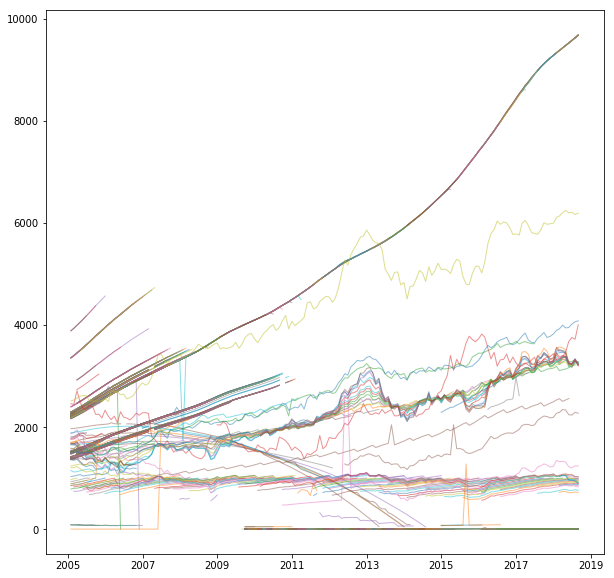

In [434]:
fig = plt.figure(figsize = (10, 10))
plt.plot(unitPrc.unstack(level = 0), linewidth = 1, alpha = 0.5)
plt.show()

In [439]:
unitPrc.head(20)

CD_ISIN       DT_COMPTC 
BRBCBRNBC4Y2  2005-01-31    1584.453095
              2005-02-28    1576.523951
              2005-03-31    1627.544775
              2005-04-30    1464.095534
              2005-05-31    1399.272810
              2005-06-30    1358.968722
              2005-07-31    1390.848518
              2005-08-31    1383.929569
              2005-09-30    1310.908419
BRBCBRNBC4Z9  2005-01-31    1580.370293
              2005-02-28    1570.498150
              2005-03-31    1620.205357
              2005-04-30    1542.557604
              2005-05-31    1394.400840
              2005-06-30    1354.125268
              2005-07-31    1385.323538
              2005-08-31    1379.178780
              2005-09-30    1306.974700
              2005-10-31    1323.581357
BRBCBRNBC501  2005-01-31    1680.356830
Name: PU, dtype: float64

In [494]:
unitPrc.unstack(level = 0).head()

CD_ISIN,BRBCBRNBC4Y2,BRBCBRNBC4Z9,BRBCBRNBC501,BRBCBRNBC519,BRBCBRNBC5U7,BRBCBRNBC5V5,BRBCBRNBC717,BRBCBRNBC725,BRBCBRNBC733,BRBCBRNBC741,...,BRSTNCNTF0L9,BRSTNCNTF0M7,BRSTNCNTF0N5,BRSTNCNTF0O3,BRSTNCNTF139,BRSTNCNTF147,BRSTNCNTF162,BRSTNCNTF170,BRSTNCNTF1P8,BRSTNCNTF1Q6
DT_COMPTC,,,,,,,,,,,,,,,,,,,,,
2005-01-31,1584.453095,1580.370293,1680.356830,1668.088450,81.802764,1363.378251,87.440713,85.690312,83.576760,81.182895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,1576.523951,1570.498150,1675.921603,1666.050016,81.647254,1360.786539,86.699129,85.063442,83.131979,81.138738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,1627.544775,1620.205357,1716.743646,1707.507138,83.997745,1399.961501,88.799960,87.022667,84.773054,82.297990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-30,1464.095534,1542.557604,1555.882446,1632.326707,79.734984,1328.915670,84.820991,83.255416,81.313342,79.031021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,1399.272810,1394.400840,1494.312981,1486.108571,75.925960,1265.432087,NaN,77.672736,76.015317,74.126897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


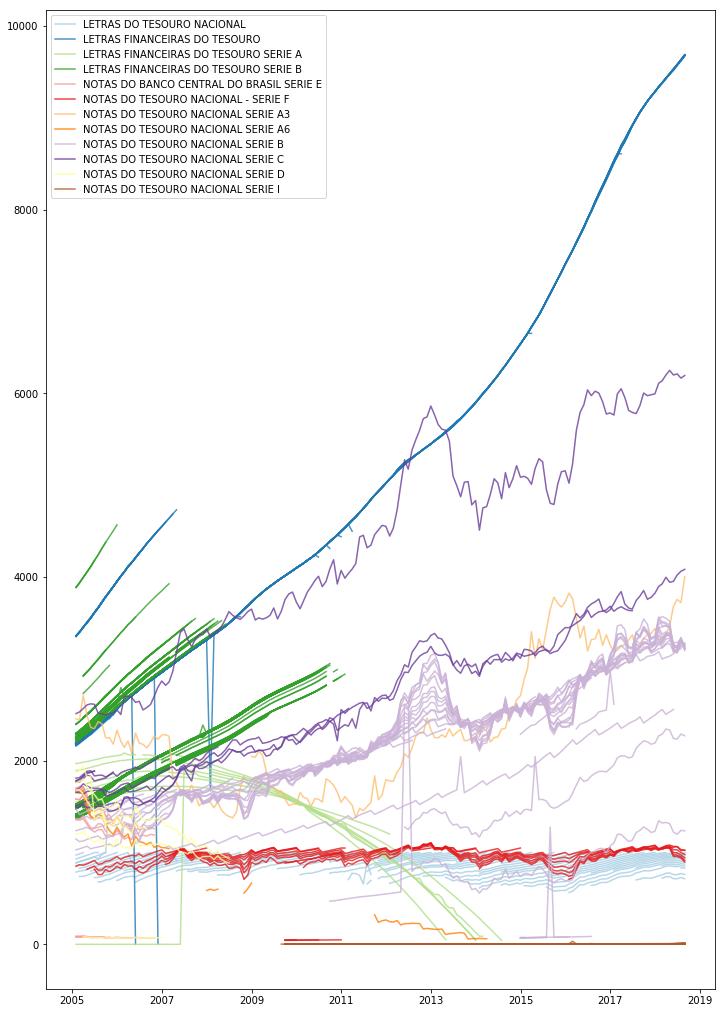

In [617]:
fig = plt.figure(figsize = (12, 18))
ax = fig.add_subplot(111)

# DF containg prices with dates in rows and ISIN code in columns
dfPrices = unitPrc.unstack(level = 0)

# pdSeries which index is the ISIN codes by bond name
isin_by_bond = df_titpub.groupby(['TP_TITPUB', 'CD_ISIN'])['TP_FUNDO'].count()
bondsNames = isin_by_bond.index.levels[0]

# Colormap
cmap = cm.get_cmap(name='Paired')
cmap = cmap(np.arange(len(bondsNames)))

# Plot price series for each bond 
for i, bond in enumerate(bondsNames):
    
    # ISIN for each bond names 'bond'
    isin_list = list(isin_by_bond.xs(bond, level = 'TP_TITPUB').index)
    
    # Filter dfPrices columns by 'bond'
    aux = dfPrices[isin_list]
      
    # Plot
    plt.plot(aux, linewidth = 1.5, alpha = 0.8, color = cmap[i], 
        label = bondsNames[i])
    
    #print(i, bond, '\n', isin_list[:3], '\n')

    
# Legend only for the first line of each bond group
occurency = []
for i, j in isin_by_bond.iteritems(): occurency += [i[0]]

display = [0]
for i in bondsNames: display += [display[-1] + occurency.count(i)]
display = display[:-1]

handles, labels = ax.get_legend_handles_labels()

ax.legend([handle for i,handle in enumerate(handles) if i in display],
      [label for i,label in enumerate(labels) if i in display], loc = 'best')

plt.show()

In [ ]:
df_BRbonds.drop(df_BRbonds[df_BRbonds['QT_POS_FINAL'] == 0].index, inplace=True)
len1 = df_BRbonds.shape[0]
print(len1 - len0)

In [ ]:
df_BRbonds.drop(df_BRbonds[df_BRbonds['QT_POS_FINAL'] == 'NA'].index, inplace=True)
len2 = df_BRbonds.shape[0]
print(len2 - len1)

In [ ]:
df_BRbonds.drop(df_BRbonds[df_BRbonds['VL_MERC_POS_FINAL'] == 0].index, inplace=True)
len3 = df_BRbonds.shape[0]
print(len3 - len2)

In [ ]:
# df_BRbonds.drop(df_BRbonds[df_BRbonds['VL_MERC_POS_FINAL'] == 'NA'].index, inplace=True)
# len4 = df_BRbonds.shape[0]
# print(len4 - len3)

In [ ]:
df_BRbonds['unitPrc'] = df_BRbonds['VL_MERC_POS_FINAL'] / df_BRbonds['QT_POS_FINAL']

In [ ]:
df_PU = df_BRbonds.groupby(['CD_ISIN', 'DT_COMPTC'])['unitPrc'].median()

In [242]:
# Read holiday calendar
holCalendar = pd.read_pickle(projPath + 'holCalendar.pkl')
holCalendar = holCalendar.apply(lambda x: pd.to_datetime(str(x)).strftime('%Y-%m-%d'))

In [ ]:
# Build assets dict for Gov. Bonds

# Filter data frame to BR bonds
df_BRbonds = dfBLC1[dfBLC1['TP_APLIC'] == 'Títulos Públicos']

# ISIN codes
isinCd = list(map(list, zip(*list(Counter(df_BRbonds['CD_ISIN']).items()))))[0]

#import random
#random.sample(obsDt, k)


# Start assets dictionary
assetsDict = {'BR_Gov_Bonds': {}}

# For each ISIN code:
i = 1
for isinCd_ in isinCd:
    
    clear_output()
    print(i, '  ', len(isinCd), '  ', isinCd_)
    
    # Update dictionary
    assetsDict['BR_Gov_Bonds'].update({isinCd_: {}})
    
    # Filter data frame
    df_ = df_BRbonds[df_BRbonds['CD_ISIN'] == isinCd_]
        
    # Asset level info
    # The maxFrequency function filters garbage in the data
    # We print a warning in case the frequency is smaller than the 
    # threshold
    
    assetName, freq = maxFrequency(df_, 'TP_TITPUB')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('TP_TITPUB', isinCd_))
    
    selicCode, freq = maxFrequency(df_, 'CD_SELIC')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('CD_SELIC', isinCd_))
    
    issueDt, freq = maxFrequency(df_, 'DT_EMISSAO')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('DT_EMISSAO', isinCd_))
    
    maturDt, freq = maxFrequency(df_, 'DT_VENC')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('DT_VENC', isinCd_))
    
    print()
    
    # Update dictionary
    assetsDict['BR_Gov_Bonds'][isinCd_].update({\
        'assetName': assetName, 
        'selicCode': selicCode, 
        'issueDt': issueDt, 
        'maturDt': maturDt, 
        'obsDt': [], 
        'unitPrc': [], 
        'daysMat': []})
    
    # Observation dates
    obsDt = list(map(list, zip(*list(Counter(df_['DT_COMPTC']).items()))))[0]
    obsDt = sorted(obsDt)
    
    ########################################################
    #print('\t', 'len obsDt', len(obsDt))
    #k = 20
    #if len(obsDt) < k: k = len(obsDt)
    ##########################################################
    
    for obsDt_ in obsDt:
        
        # Filter data frame
        df__ = df_[df_['DT_COMPTC'] == obsDt_]
        
        # Some assets may not have info for a specific 'obsDt_'
        if df__.shape[0] > 0:

            print('\t', obsDt_, '\t Rows: ', df__.shape[0])
            
            # Compute unitary price for each row
            df__['unitPrc'] = df__.apply(lambda row: computePU(row), axis = 1)

            
            
            
            
            
            
            
            
            
            
            # Compute business days to maturity for each row
            #df__['daysMat'] = df_.apply(lambda row: computeBdays(row, holCalendar), axis = 1)

            # Median 'unitPrc' and 'daysMat', to eliminate garbage
            # The if statement avoyds errors for 'df__' w/ all rows 
            # equal to 'None'
            if all(df__['unitPrc'].values == None):
                unitPrc_ = 'NA'
            else:
                unitPrc_ = np.median(df__['unitPrc'][~np.isnan(df__['unitPrc'])])
            
            if all(df__['daysMat'].values == None):
                daysMat_ = 'NA'
            else:
                daysMat_ = np.median(df__['daysMat'][~np.isnan(df__['daysMat'])])

            
            # Update dictionary
            assetsDict['BR_Gov_Bonds'][isinCd_]['obsDt'] += [obsDt_]
            assetsDict['BR_Gov_Bonds'][isinCd_]['unitPrc'] += [unitPrc_]
            assetsDict['BR_Gov_Bonds'][isinCd_]['daysMat'] += [daysMat_]
        
        else:
            print('\t', obsDt_, '\t Rows: ', df__.shape[0])
    i += 1
    print()

print('Done.')

In [ ]:
# Build assets dict for Gov. Bonds

# Filter data frame to BR bonds
df_BRbonds = dfBLC1[dfBLC1['TP_APLIC'] == 'Títulos Públicos']

# ISIN codes
isinCd = list(map(list, zip(*list(Counter(df_BRbonds['CD_ISIN']).items()))))[0]

#import random
#random.sample(obsDt, k)


# Start assets dictionary
assetsDict = {'BR_Gov_Bonds': {}}

# For each ISIN code:
i = 1
for isinCd_ in isinCd:
    
    clear_output()
    print(i, '  ', len(isinCd), '  ', isinCd_)
    
    # Update dictionary
    assetsDict['BR_Gov_Bonds'].update({isinCd_: {}})
    
    # Filter data frame
    df_ = df_BRbonds[df_BRbonds['CD_ISIN'] == isinCd_]
        
    # Asset level info
    # The maxFrequency function filters garbage in the data
    # We print a warning in case the frequency is smaller than the 
    # threshold
    
    assetName, freq = maxFrequency(df_, 'TP_TITPUB')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('TP_TITPUB', isinCd_))
    
    selicCode, freq = maxFrequency(df_, 'CD_SELIC')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('CD_SELIC', isinCd_))
    
    issueDt, freq = maxFrequency(df_, 'DT_EMISSAO')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('DT_EMISSAO', isinCd_))
    
    maturDt, freq = maxFrequency(df_, 'DT_VENC')
    if freq < 0.95: print('Warning: %s column below threshold for asset %s.' % ('DT_VENC', isinCd_))
    
    print()
    
    # Update dictionary
    assetsDict['BR_Gov_Bonds'][isinCd_].update({\
        'assetName': assetName, 
        'selicCode': selicCode, 
        'issueDt': issueDt, 
        'maturDt': maturDt, 
        'obsDt': [], 
        'unitPrc': [], 
        'daysMat': []})
    
    # Observation dates
    obsDt = list(map(list, zip(*list(Counter(df_['DT_COMPTC']).items()))))[0]
    obsDt = sorted(obsDt)
    
    ########################################################
    #print('\t', 'len obsDt', len(obsDt))
    #k = 20
    #if len(obsDt) < k: k = len(obsDt)
    ##########################################################
    
    for obsDt_ in obsDt:
        
        # Filter data frame
        df__ = df_[df_['DT_COMPTC'] == obsDt_]
        
        # Some assets may not have info for a specific 'obsDt_'
        if df__.shape[0] > 0:

            print('\t', obsDt_, '\t Rows: ', df__.shape[0])
            
            # Compute unitary price for each row
            df__['unitPrc'] = df__.apply(lambda row: computePU(row), axis = 1)

            # Compute business days to maturity for each row
            df__['daysMat'] = df_.apply(lambda row: computeBdays(row, holCalendar), axis = 1)

            # Median 'unitPrc' and 'daysMat', to eliminate garbage
            # The if statement avoyds errors for 'df__' w/ all rows 
            # equal to 'None'
            if all(df__['unitPrc'].values == None):
                unitPrc_ = 'NA'
            else:
                unitPrc_ = np.median(df__['unitPrc'][~np.isnan(df__['unitPrc'])])
            
            if all(df__['daysMat'].values == None):
                daysMat_ = 'NA'
            else:
                daysMat_ = np.median(df__['daysMat'][~np.isnan(df__['daysMat'])])

            
            # Update dictionary
            assetsDict['BR_Gov_Bonds'][isinCd_]['obsDt'] += [obsDt_]
            assetsDict['BR_Gov_Bonds'][isinCd_]['unitPrc'] += [unitPrc_]
            assetsDict['BR_Gov_Bonds'][isinCd_]['daysMat'] += [daysMat_]
        
        else:
            print('\t', obsDt_, '\t Rows: ', df__.shape[0])
    i += 1
    print()

print('Done.')

In [ ]:
np.save(strucPath + 'assetDict_govBonds.npy', assetsDict)

In [ ]:
assetsDict

In [ ]:
assetsDict['BR_Gov_Bonds'].keys()

In [ ]:
assetsDict['BR_Gov_Bonds']['BRSTNCNI1134'].keys()

In [ ]:
#assetsDict['BR_Gov_Bonds']['BRSTNCNI1134']['obsDt']

In [ ]:
#assetsDict['BR_Gov_Bonds']['BRSTNCNI1134']['unitPrc']

In [ ]:
assetsDict['BR_Gov_Bonds']['BRSTNCNI1134']['daysMat']

In [ ]:
fig = plt.figure(figsize = (10, 10))
gs = gridspec.GridSpec(ncols = 1, nrows = 1, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])

plt.scatter(zzz['DT_COMPTC'].dt.to_pydatetime(), zzz['PU'], alpha = 0.3, s = 10)

plt.show()

In [ ]:
pd.bdate_range('2011-01-05', '2011-01-09')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [ ]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [ ]:
print(pd.DatetimeIndex(start='2010-01-01',end='2010-01-15', freq=us_bd))

#### Type of investment

In [ ]:
# Group by date, adding and counting the PL in BI
df_sum = (dfBLC1.groupby(['TP_APLIC', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

df_count = (dfBLC1.groupby(['TP_APLIC', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

df_mean = (df_sum / df_count) * 10**3

In [ ]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Bond type for BR Bonds investments
#### Aplicações em 'Tít. Públicos', exclui 'Op. Compromissadas'

In [ ]:
dfBonds = dfBLC1.copy(deep = True)
dfBonds = dfBonds[dfBonds['TP_APLIC'] == 'Títulos Públicos']
dfBonds = dfBonds.reset_index(drop = True)

In [ ]:
# Group by date, adding and counting the PL in BI
dfBonds_sum = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

dfBonds_count = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

dfBonds_mean = (dfBonds_sum / dfBonds_count) * 10**3

In [ ]:
fig = plt.figure(figsize = (7, 12))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Bond type for BR Bonds investments
#### Aplicações em 'Tít. Públicos', exclui 'Op. Compromissadas'

In [ ]:
dfBonds.head()

In [ ]:
field = 'TP_TITPUB'
aux = list(map(list, zip(*list(Counter(dfBonds[field]).items()))))
print(aux[0])
print([round(x / sum(aux[1]), 2) for x in aux[1]])

In [ ]:
# Group by date, adding and counting the PL in BI
dfBonds_sum = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .sum() / 10**9).unstack(level = 0)

dfBonds_count = (dfBonds.groupby(['TP_TITPUB', 'DT_COMPTC'])['VL_MERC_POS_FINAL']\
    .count()).unstack(level = 0)

dfBonds_mean = (dfBonds_sum / dfBonds_count) * 10**3

In [ ]:
fig = plt.figure(figsize = (7, 12))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_sum[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total pos., $ bi.')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax = fig.add_subplot(gs[1, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_count[i], linewidth = 1.75, label = i)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of pos.')

ax = fig.add_subplot(gs[2, 0])
for i in list(df_sum):
    plt.plot(df_sum.index, df_mean[i], linewidth = 1.75, label = i)
plt.ylabel('Mean pos., $ mi.')

plt.show()

#### Total PL

In [ ]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### We can see three some errors in data, lets locate it and substitute by time neighbors interpolation

In [ ]:
# We have to run 'interpOut' three times
dfPL = interpOutlier(dfPL)

In [ ]:
dfPL = interpOutlier(dfPL)

In [ ]:
dfPL = interpOutlier(dfPL)

In [ ]:
# Total PL: group by date, sum and transfor units to trillions
dfSum = dfPL.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12

fig = plt.figure(figsize = (8, 3))
plt.plot(dfSum, 'k', linewidth = 0.75)
plt.show()

#### Cheking PL evolution by fund type

In [ ]:
# Fund types
field = 'TP_FUNDO'
aux = list(map(list, zip(*list(Counter(dfPL[field]).items()))))
fundTypes = aux[0]
print(fundTypes)

In [ ]:
# Group by fund type and date, adding the PL in trillions
dfTypeSum = dfPL.groupby(['TP_FUNDO', 'DT_COMPTC'])['VL_PATRIM_LIQ'].sum() \
    / 10**12
dfTypeSum = dfTypeSum.unstack(level = 0)
dfTypeSum.head()

In [ ]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    #if ft not in ['FI', 'FI-FGTS', 'FIF', 'FACFIF', 'FIP', 'FITVM', 'FMP-FGTS']:
    plt.plot(dfTypeSum.index, dfTypeSum[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### In percentage

In [ ]:
dfTypeSum['total'] = dfTypeSum[list(dfTypeSum)].sum(axis=1)
dfTypeSumPerc = dfTypeSum.div(dfTypeSum.total, axis='index')
dfTypeSumPerc.head()

In [ ]:
fig = plt.figure(figsize = (7, 4))
ax = fig.add_subplot(1,1,1)

# Plot each type
for ft in fundTypes:
    plt.plot(dfTypeSum.index, percent[ft].values, linewidth = 1.75, label = ft)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Only the FI type

In [ ]:
dfFI = dfPL[dfPL['TP_FUNDO'] == 'FI']
dfFI = dfFI.reset_index(drop = True)

In [ ]:
# Group by date, adding and counting the PL in trillions
dfFIsum = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].sum() / 10**12
dfFIcount = dfFI.groupby(['DT_COMPTC'])['VL_PATRIM_LIQ'].count()
dfFImeanPL = (dfFIsum / dfFIcount) * 10**6

In [ ]:
fig = plt.figure(figsize = (7, 6))
gs = gridspec.GridSpec(ncols = 1, nrows = 3, hspace = 0.05)

ax = fig.add_subplot(gs[0, 0])
plt.plot(dfFIsum.index, dfFIsum, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Total PL, trillions')

ax = fig.add_subplot(gs[1, 0])
plt.plot(dfFIcount.index, dfFIcount, linewidth = 1.75)
ax.get_xaxis().set_ticks([])
plt.ylabel('Number of funds')

ax = fig.add_subplot(gs[2, 0])
plt.plot(dfFImeanPL.index, dfFImeanPL, linewidth = 1.75)
plt.ylabel('Mean PL, millions')

plt.show()